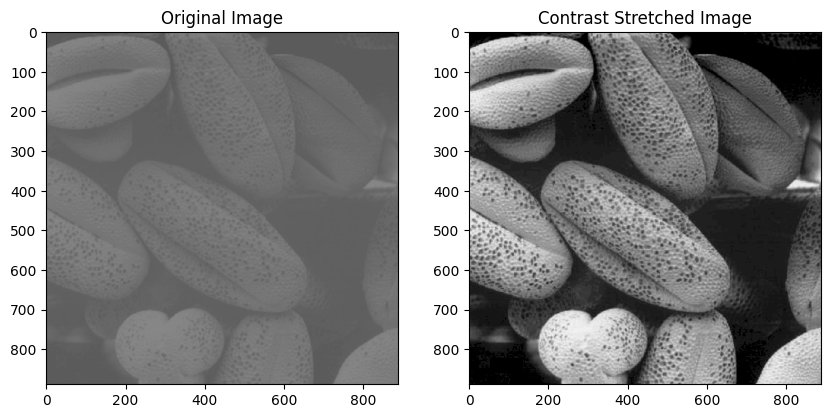

In [14]:

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/Fig0310(b)(washed_out_pollen_image).tif')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply contrast stretching
min_val = np.min(gray_image)
max_val = np.max(gray_image)
new_image = (255 / (max_val - min_val)) * (gray_image - min_val)

# Display the original and stretched images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap='gray')
plt.title('Contrast Stretched Image')

plt.show()


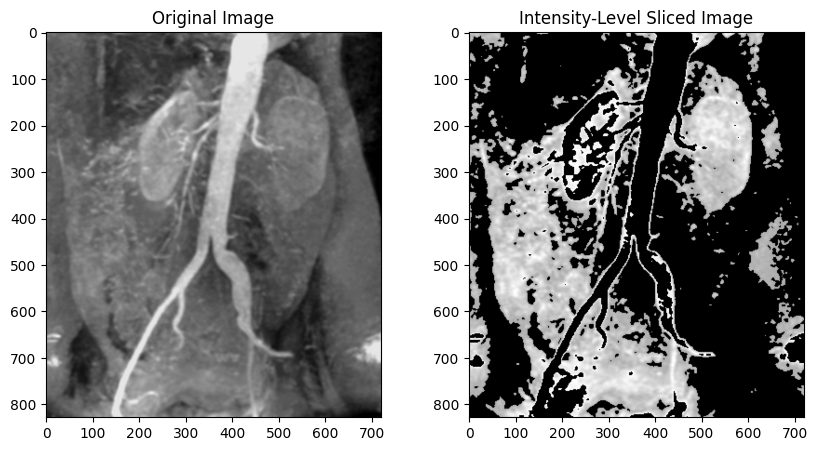

In [ ]:

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/Fig0312(a)(kidney).tif')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the intensity levels for slicing
lower_level = 100
upper_level = 150

# Create a binary mask
mask = np.zeros_like(gray_image)
mask[(gray_image >= lower_level) & (gray_image <= upper_level)] = 255

# Apply the mask to the image
sliced_image = cv2.bitwise_and(gray_image, gray_image, mask=mask)

# Display the original and sliced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(sliced_image, cmap='gray')
plt.title('Intensity-Level Sliced Image')
plt.show()


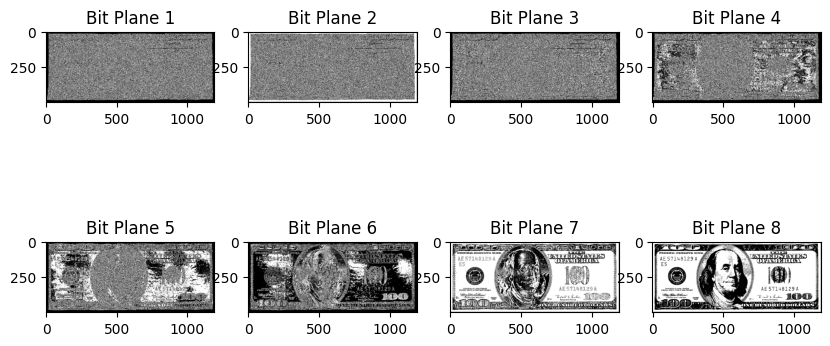

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
# Read the image
image = cv2.imread('/content/Fig0314(a)(100-dollars).tif', cv2.IMREAD_GRAYSCALE)

# Get the image dimensions
rows, cols = image.shape

# Create a list to store the bit planes
bit_planes = []

# Iterate over the bits from MSB to LSB
for i in range(8):
  # Create a blank image
  bit_plane = np.zeros((rows, cols), dtype=np.uint8)

  # Extract the bit plane
  for j in range(rows):
    for k in range(cols):
      bit_plane[j, k] = (image[j, k] >> i) & 1

  # Add the bit plane to the list
  bit_planes.append(bit_plane)

# Display the bit planes
plt.figure(figsize=(10, 5))
for i in range(8):
  plt.subplot(2, 4, i + 1)
  plt.imshow(bit_planes[i], cmap='gray')
  plt.title('Bit Plane {}'.format(i + 1))
plt.show()


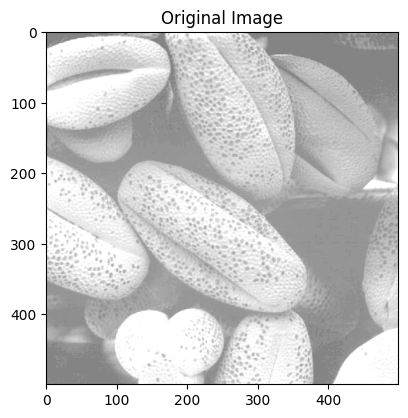

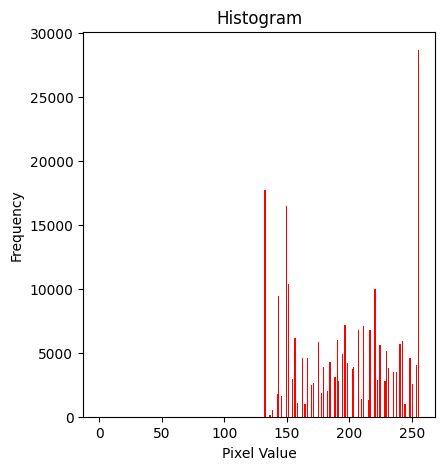

In [9]:

import matplotlib.pyplot as plt
# Read the image
image = cv2.imread('/content/Fig0316(1)(top_left).tif')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization
equ_image = cv2.equalizeHist(gray_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Display the original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.hist(gray_image.flatten(), 256, [0,256], color='r')
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.show()


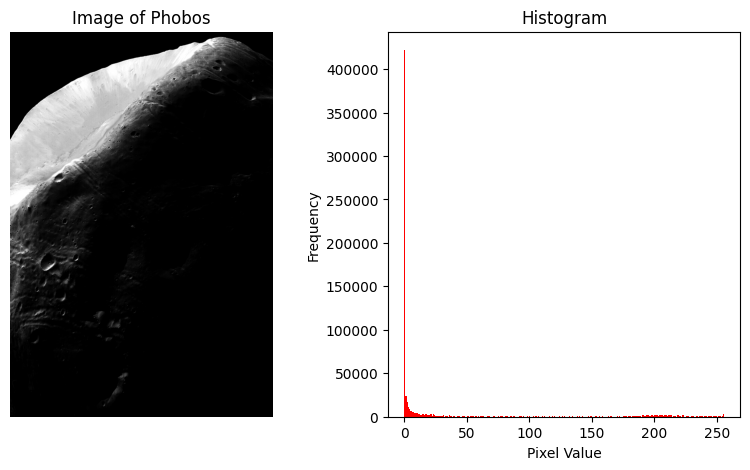

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Step 2: Read the image
image = cv2.imread('/content/Fig0323(a)(mars_moon_phobos).tif')

# Step 3: Display the image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image of Phobos')
plt.axis('off')

# Step 4: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 5: Calculate and plot the histogram
plt.subplot(1, 2, 2)
plt.hist(gray_image.flatten(), 256, [0,256], color='r')
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Show plots
plt.show()


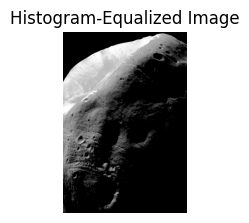

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the image
image = cv2.imread('/content/Fig0323(a)(mars_moon_phobos).tif')

# Step 2: Calculate histogram
hist, bins = np.histogram(image.flatten(), 256, [0,256])

# Step 3: Calculate cumulative distribution function (CDF)
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# Step 4: Transformation function for histogram equalization
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

# Step 5: Apply the transformation to the image
equalized_image = cdf[image]

# Step 6: Plotting
plt.figure(figsize=(10, 8))


# (b) Histogram-equalized image
plt.subplot(3, 1, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram-Equalized Image')
plt.axis('off')


plt.show()


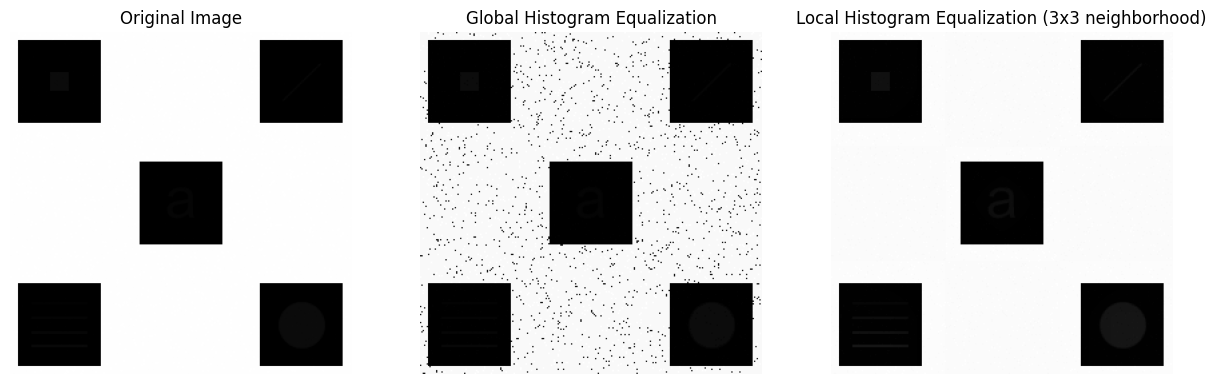

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the original image
original_image = cv2.imread('/content/Fig0326(a)(embedded_square_noisy_512).tif', cv2.IMREAD_GRAYSCALE)

# Apply global histogram equalization
global_equalized_image = cv2.equalizeHist(original_image)

# Apply local histogram equalization using a neighborhood of size 3x3
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3, 3))
local_equalized_image = clahe.apply(original_image)

# Plotting
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Global histogram equalization result
plt.subplot(1, 3, 2)
plt.imshow(global_equalized_image, cmap='gray')
plt.title('Global Histogram Equalization')
plt.axis('off')

# Local histogram equalization result
plt.subplot(1, 3, 3)
plt.imshow(local_equalized_image, cmap='gray')
plt.title('Local Histogram Equalization (3x3 neighborhood)')
plt.axis('off')

plt.show()


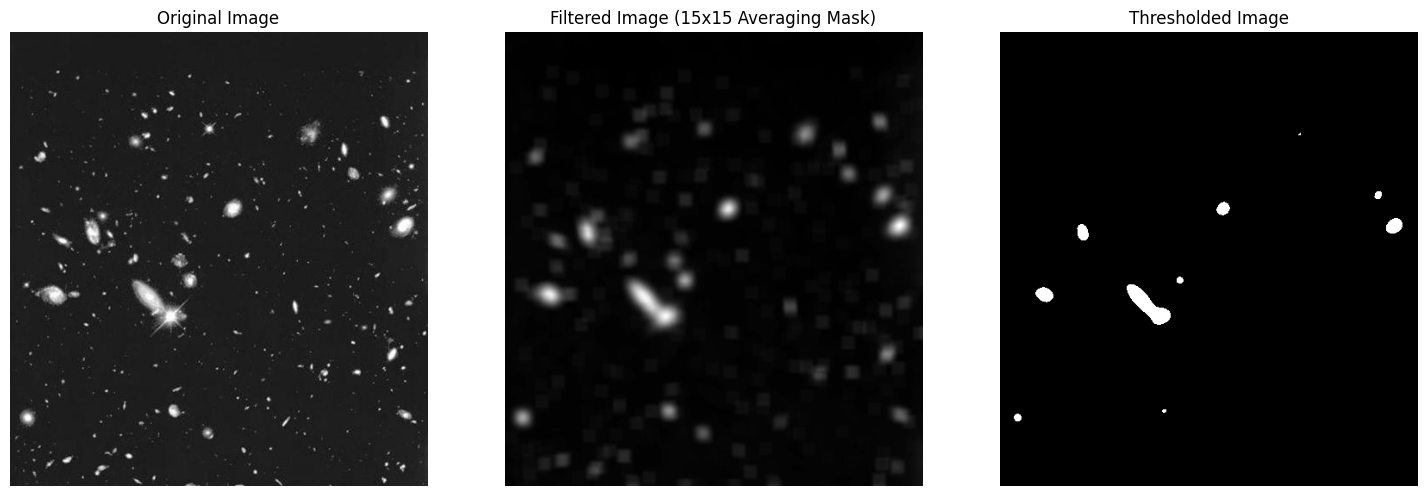

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the original image
original_image = cv2.imread('/content/Fig0334(a)(hubble-original).tif', cv2.IMREAD_GRAYSCALE)

# Step 2: Display the original image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Step 3: Filter the image with a 15x15 averaging mask
averaging_mask = np.ones((15, 15), dtype=np.float32) / 225
filtered_image = cv2.filter2D(original_image, -1, averaging_mask)

# Step 4: Display the filtered image
plt.subplot(1, 3, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (15x15 Averaging Mask)')
plt.axis('off')

# Step 5: Apply thresholding to the filtered image
_, thresholded_image = cv2.threshold(filtered_image, 127, 255, cv2.THRESH_BINARY)

# Step 6: Display the thresholded image
plt.subplot(1, 3, 3)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

plt.tight_layout()
plt.show()


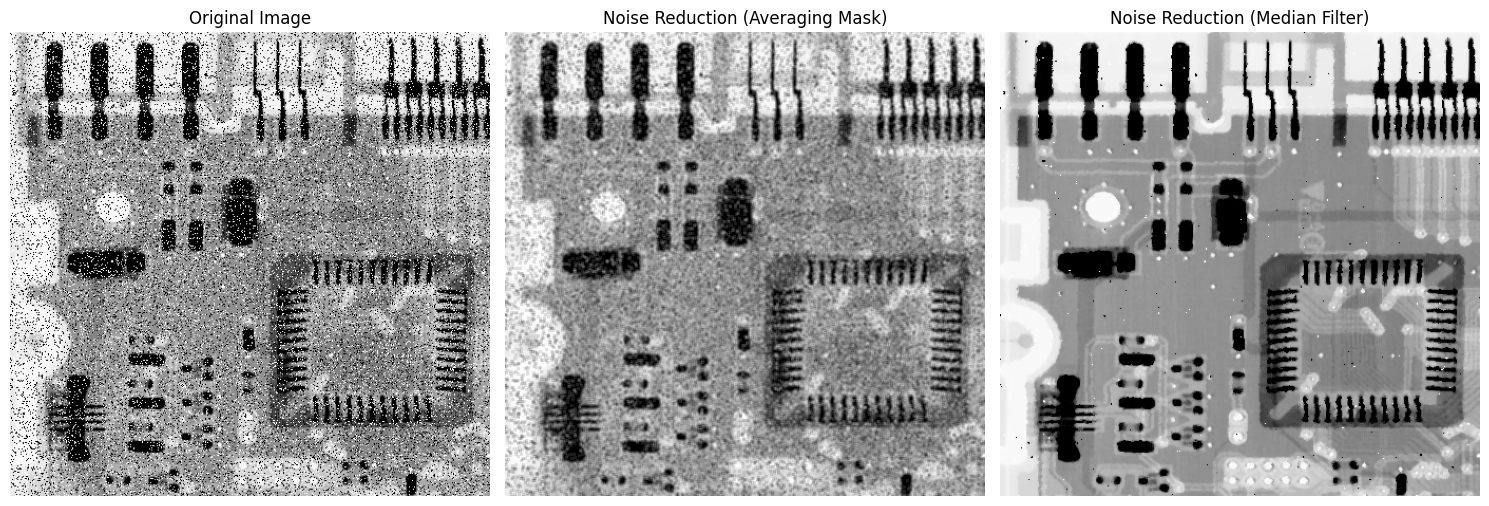

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the original image
original_image = cv2.imread('/content/Fig0335(a)(ckt_board_saltpep_prob_pt05).tif', cv2.IMREAD_GRAYSCALE)

# Step 2: Display the original image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Step 3: Noise reduction with a 3x3 averaging mask
averaging_mask = np.ones((3, 3), dtype=np.float32) / 9
averaging_filtered_image = cv2.filter2D(original_image, -1, averaging_mask)

# Step 4: Display the image after averaging filtering
plt.subplot(1, 3, 2)
plt.imshow(averaging_filtered_image, cmap='gray')
plt.title('Noise Reduction (Averaging Mask)')
plt.axis('off')

# Step 5: Noise reduction with a 3x3 median filter
median_filtered_image = cv2.medianBlur(original_image, 3)

# Step 6: Display the image after median filtering
plt.subplot(1, 3, 3)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Noise Reduction (Median Filter)')
plt.axis('off')

plt.tight_layout()
plt.show()


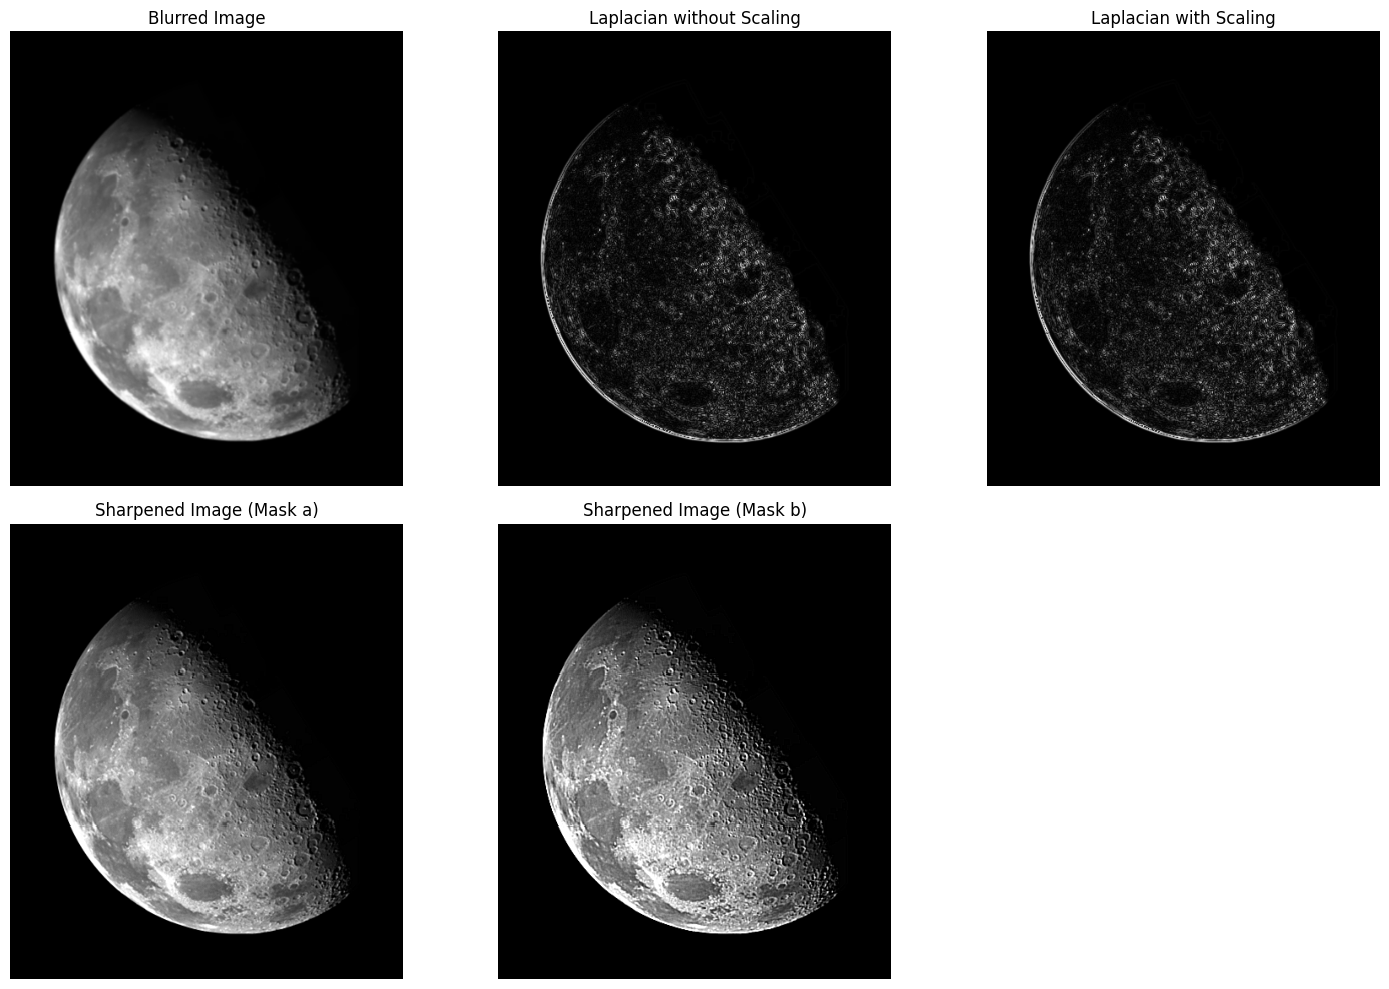

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the blurred image
blurred_image = cv2.imread('/content/Fig0338(a)(blurry_moon).tif', cv2.IMREAD_GRAYSCALE)

# Step 2: Display the blurred image
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

# Step 3: Apply Laplacian without scaling
laplacian_no_scale = cv2.Laplacian(blurred_image, cv2.CV_64F, ksize=3)
laplacian_no_scale = np.uint8(np.absolute(laplacian_no_scale))
plt.subplot(2, 3, 2)
plt.imshow(laplacian_no_scale, cmap='gray')
plt.title('Laplacian without Scaling')
plt.axis('off')

# Step 4: Apply Laplacian with scaling
laplacian_with_scale = cv2.Laplacian(blurred_image, cv2.CV_64F, ksize=3)
laplacian_with_scale = np.uint8(np.absolute(laplacian_with_scale))
plt.subplot(2, 3, 3)
plt.imshow(laplacian_with_scale, cmap='gray')
plt.title('Laplacian with Scaling')
plt.axis('off')

# Step 5: Image sharpening using the mask in Fig. 3.37(a)
sharpening_kernel_a = np.array([[0, -1, 0],
                                [-1, 5, -1],
                                [0, -1, 0]])
sharpened_image_a = cv2.filter2D(blurred_image, -1, sharpening_kernel_a)
plt.subplot(2, 3, 4)
plt.imshow(sharpened_image_a, cmap='gray')
plt.title('Sharpened Image (Mask a)')
plt.axis('off')

# Step 6: Image sharpening using the mask in Fig. 3.37(b)
sharpening_kernel_b = np.array([[-1, -1, -1],
                                [-1, 9, -1],
                                [-1, -1, -1]])
sharpened_image_b = cv2.filter2D(blurred_image, -1, sharpening_kernel_b)
plt.subplot(2, 3, 5)
plt.imshow(sharpened_image_b, cmap='gray')
plt.title('Sharpened Image (Mask b)')
plt.axis('off')

plt.tight_layout()
plt.show()


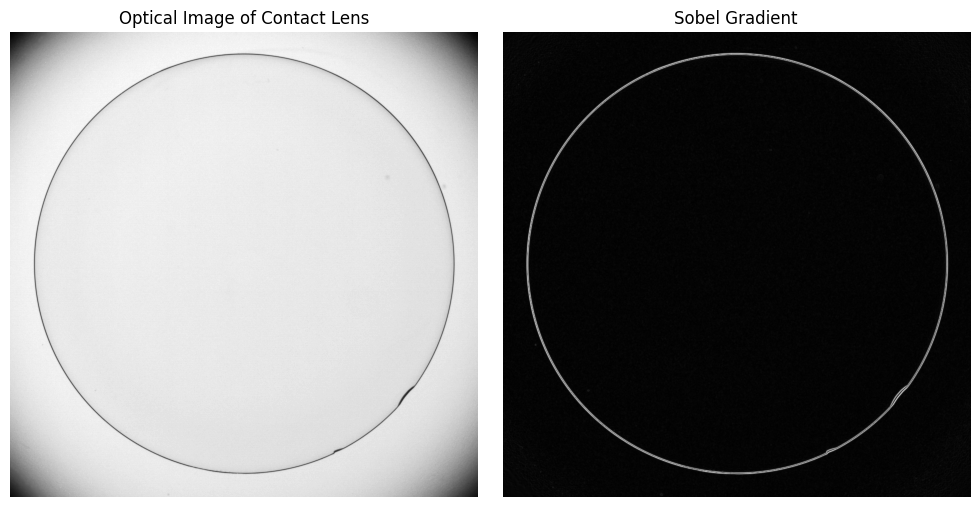

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the optical image of the contact lens
contact_lens_image = cv2.imread('/content/Fig0342(a)(contact_lens_original).tif', cv2.IMREAD_GRAYSCALE)

# Step 2: Display the optical image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(contact_lens_image, cmap='gray')
plt.title('Optical Image of Contact Lens')
plt.axis('off')

# Step 3: Apply the Sobel gradient
sobel_x = cv2.Sobel(contact_lens_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(contact_lens_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_gradient = np.sqrt(sobel_x ** 2 + sobel_y ** 2)

# Step 4: Display the Sobel gradient
plt.subplot(1, 2, 2)
plt.imshow(sobel_gradient, cmap='gray')
plt.title('Sobel Gradient')
plt.axis('off')

plt.tight_layout()
plt.show()


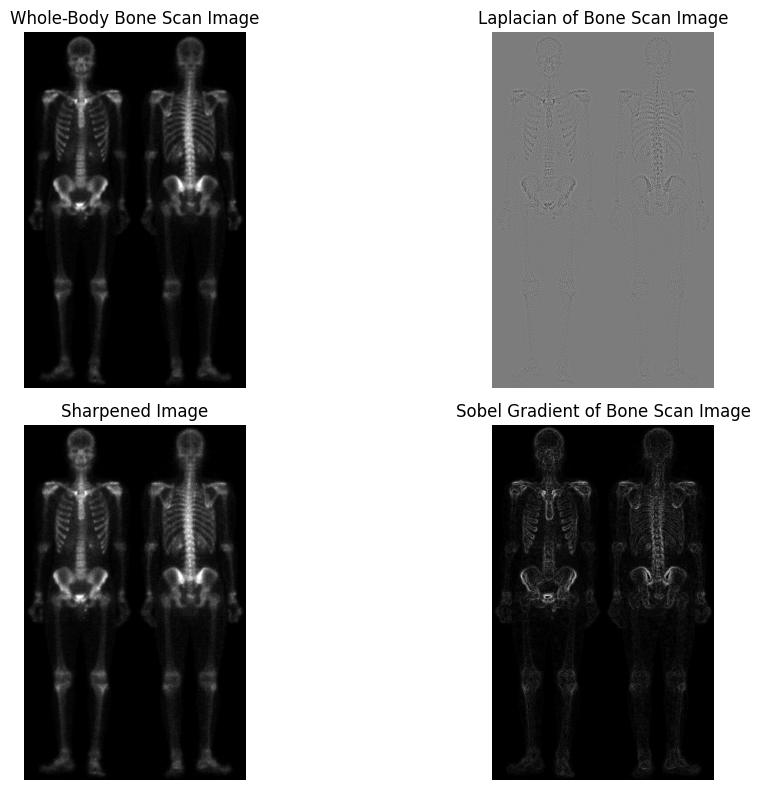

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the image of the whole-body bone scan
bone_scan_image = cv2.imread('/content/Fig0343(a)(skeleton_orig).tif', cv2.IMREAD_GRAYSCALE)

# Step 2: Display the whole-body bone scan image
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(bone_scan_image, cmap='gray')
plt.title('Whole-Body Bone Scan Image')
plt.axis('off')

# Step 3: Calculate the Laplacian of the whole-body bone scan image
laplacian = cv2.Laplacian(bone_scan_image, cv2.CV_64F)

# Step 4: Display the Laplacian of the whole-body bone scan image
plt.subplot(2, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian of Bone Scan Image')
plt.axis('off')

# Step 5: Obtain the sharpened image by adding the original image and its Laplacian
# Convert Laplacian to the same data type as the original bone scan image
laplacian_uint8 = cv2.convertScaleAbs(laplacian)

# Obtain the sharpened image by adding the original image and its Laplacian
sharpened_image = cv2.addWeighted(bone_scan_image, 1, laplacian_uint8, 1, 0)

# Step 6: Display the sharpened image
plt.subplot(2, 2, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

# Step 7: Compute the Sobel gradient of the whole-body bone scan image
sobel_x = cv2.Sobel(bone_scan_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(bone_scan_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_gradient = np.sqrt(sobel_x ** 2 + sobel_y ** 2)

# Step 8: Display the Sobel gradient of the whole-body bone scan image
plt.subplot(2, 2, 4)
plt.imshow(sobel_gradient, cmap='gray')
plt.title('Sobel Gradient of Bone Scan Image')
plt.axis('off')

plt.tight_layout()
plt.show()
